# scipy constants

In [1]:
from scipy import constants

print(constants.pi)

3.141592653589793


In [2]:
print(dir(constants))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', 'gram', 'gravitational_con

In [3]:
print(constants.giga)    
print(constants.kilo)

1000000000.0
1000.0


In [4]:
print(constants.deci)

0.1


In [7]:
print(constants.kibi)
print(constants.mebi)
print(constants.gibi)

1024
1048576
1073741824


In [8]:
print(constants.gram)  

0.001


In [9]:
print(constants.degree) 

0.017453292519943295


In [10]:
print(constants.minute)
print(constants.hour)
print(constants.day)

60.0
3600.0
86400.0


In [11]:
print(constants.inch)
print(constants.foot) 

0.0254
0.30479999999999996


# scipy optimizers

In [13]:
from scipy.optimize import root
from math import cos

In [14]:
def eqn(x):
  return x + cos(x)

myroot = root(eqn, 0)

print(myroot.x)

[-0.73908513]


In [15]:
# minimizing equation

from scipy.optimize import minimize

def eqn(x):
  return x**2 + x + 2

mymin = minimize(eqn, 0, method='BFGS')

print(mymin)

      fun: 1.75
 hess_inv: array([[0.50000001]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-0.50000001])


# scipy sparse data

In [16]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])

print(csr_matrix(arr))

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2


In [18]:
#Viewing stored data (not the zero items) with the data property

import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

print(csr_matrix(arr).data)

[1 1 2]


In [19]:
# Counting nonzeros with the count_nonzero() method

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

print(csr_matrix(arr).count_nonzero())

3


In [20]:
# Eliminating duplicates by adding them:

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat = csr_matrix(arr)
mat.sum_duplicates()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


# scipy graphs

In [21]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(connected_components(newarr))

(1, array([0, 0, 0]))


In [23]:
# Find the shortest path from element 1 to 2:

import numpy as np
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix
    
arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(dijkstra(newarr, return_predecessors=True, indices=0))

(array([0., 1., 2.]), array([-9999,     0,     0]))


# spatial data

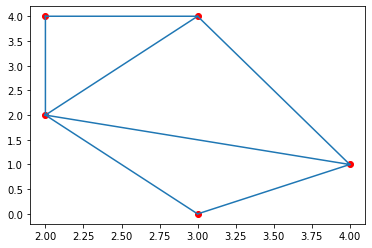

In [24]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

In [25]:
# Find the euclidean distance between given points.

from scipy.spatial.distance import euclidean

p1 = (1, 0)
p2 = (10, 2)

res = euclidean(p1, p2)

print(res)

9.219544457292887


# scipy matlab arrays

In [29]:
from scipy import io
import numpy as np

arr = np.arange(10)
io.savemat('arr.mat', {"vec": arr})

In [30]:
# import
mydata = io.loadmat('arr.mat', squeeze_me=True)

print(mydata['vec'])

[0 1 2 3 4 5 6 7 8 9]


# scipy interpolation

In [33]:
from scipy.interpolate import interp1d
import numpy as np

xs = np.arange(10)
ys = 2*xs + 1

interp_func = interp1d(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

for i in newarr:
    print(i)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]
5.2
5.4
5.6000000000000005
5.800000000000001
6.000000000000001
6.200000000000001
6.400000000000001
6.600000000000001
6.800000000000002


# scipy significance tests

In [35]:
# Find if the given values v1 and v2 are from same distribution:

import numpy as np
from scipy.stats import ttest_ind

v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=-0.10092938107341706, pvalue=0.919708647331177)
